<a href="https://colab.research.google.com/github/Raghuramvd/demo-repo/blob/main/gold_pre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression

Data collection and processing

In [ ]:
#loading csv to pandas data frame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
#print first five rows
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
#print last five data frame
gold_data.tail()


,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
#number of rows and columns
gold_data.shape

(2290, 6)

In [ ]:
#getting some basic info about data
gold_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#checking number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
#getting the statistical measures of the data
gold_data.describe()


,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


correleation:
  1.positive correlation
  2.Negative correlation

In [ ]:
correlation = gold_data.corr()

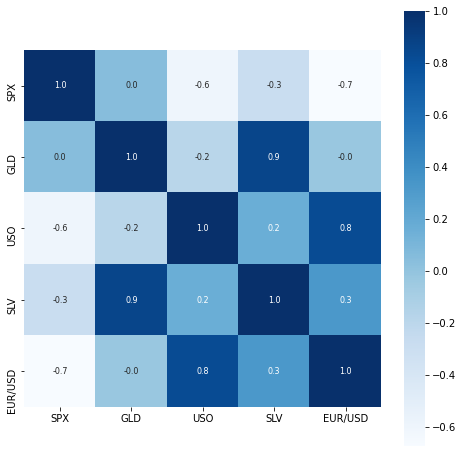

In [ ]:
#constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
#correlation values of GLD


print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


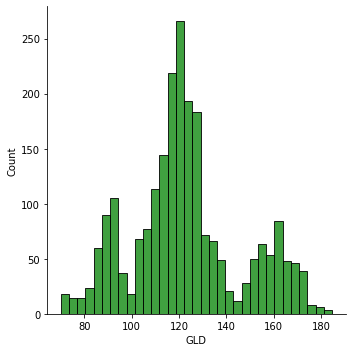

In [ ]:
#checking the distribution of the GLD price
sns.displot(gold_data['GLD'],color='green')

splitting the features and target (gold and date)

In [ ]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


splitting into training data and test data 

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=2)

model Training:
Random forest  Regressor 


In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Model evaluation

In [ ]:
#prediction on Test Data
test_data_prediction=regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.68449967  82.02389996 116.17810003 127.66170085 120.82890131
 154.74819774 150.15929927 126.16140027 117.41029883 125.87800101
 116.76950108 171.5890007  141.95409882 168.19929899 115.20049982
 117.73670044 136.97140352 170.11210059 159.4500027  157.45339942
 154.89170025 125.39660044 176.23649954 156.45690328 125.15760044
  93.9111996   77.66950018 120.59830016 118.9816988  167.45359896
  88.27430047 125.25120009  91.15660076 117.75820031 121.0192995
 136.67070118 115.47530089 114.43630084 147.97420017 107.13990098
 104.36130255  87.19379803 126.56630038 117.81100012 153.80609928
 119.77190019 108.33689983 107.87419829  93.25400027 126.90859838
  74.60200045 113.55529902 121.35750032 111.32749967 118.78259883
 120.56659931 160.07999953 167.69060091 146.90879667  86.03669908
  94.46580049  86.77199867  90.62890026 118.96330092 126.43820105
 127.61669982 169.79350018 122.20339955 117.3561993   98.27080023
 168.61100102 142.87829841 131.9266033  121.18900208 120.70209943
 119.815000

In [ ]:
#R square error
error_score=metrics.r2_score(Y_test, test_data_prediction)
print("R square error:",error_score)

R square error: 0.9895186991521377


compare the actual value and predicted values in a plot 

In [ ]:
#Y_test to list convertion so we dont get errors 
Y_test=list(Y_test)

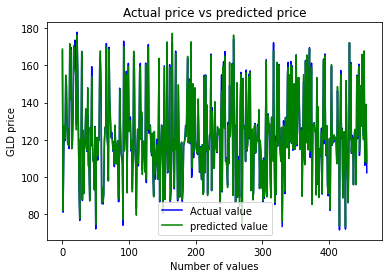

In [46]:
plt.plot(Y_test, color='blue', label='Actual value')
plt.plot(test_data_prediction, color='green',label='predicted value')
plt.title('Actual price vs predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc962c6fd10>,
      dtype=object)

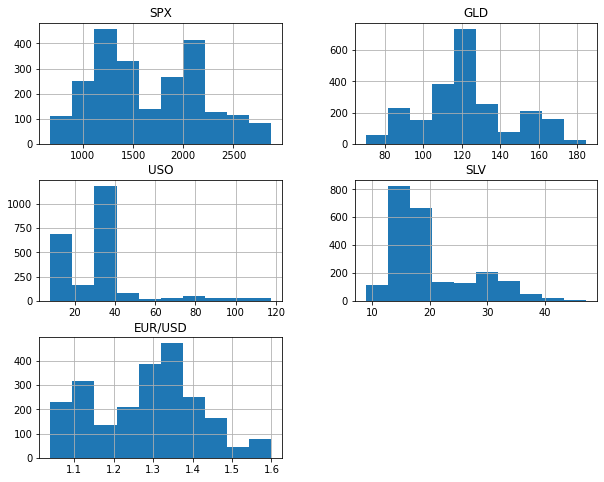

In [ ]:
gold_data.hist(figsize=(10,8))

In [ ]:


#Converting the date column to the proper format
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
gold_data['Date'] = gold_data['Date'].apply(lambda x:x.date())


In [ ]:
gold_data.describe(include='all')

,Date,SPX,GLD,USO,SLV,EUR/USD
count,2290,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
unique,2290,NaN,NaN,NaN,NaN,NaN
top,2009-06-24,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,1654.315776,122.732875,31.842221,20.084997,1.283653
std,NaN,519.111540,23.283346,19.523517,7.092566,0.131547
min,NaN,676.530029,70.000000,7.960000,8.850000,1.039047
25%,NaN,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,NaN,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,NaN,2073.010070,132.840004,37.827501,22.882499,1.369971


In [ ]:


#Creating a year column just for some data visualization
gold_data['Year'] =gold_data['Date'].apply(lambda x: x.year)



In [ ]:
gold_data['Year'].value_counts()

2009    224
2014    224
2015    223
2011    222
2010    222
2013    221
2016    221
2012    219
2017    218
2008    209
2018     87
Name: Year, dtype: int64

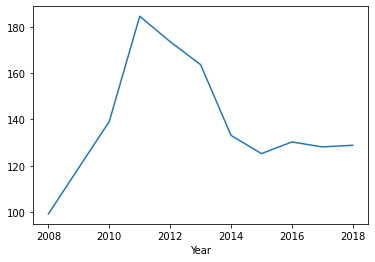

In [ ]:
#We can see how the maximum gold value changed from 2008 to 2018
gold_data.groupby('Year').max()['GLD'].plot()